<a href="https://colab.research.google.com/github/oveay/AM/blob/main/AM_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1 - Численное дифференцирование и интегрирование
*Ведерников Ярослав М32011, Хауров Никита М32011*

In [12]:
"""
  :numpy        - scientific computing
  :matplotlib   - visualization

"""
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List, Tuple

### Реализация методов правой, левой и центральной разностных производных

In [13]:
from numpy.core.function_base import linspace
# Вычисление производной в точке

def right_diff(F: Callable[[float], float], x: float, h: float):
    """
    Arguments:
        F: Source function
        x: F argument
        h: Grid pitch
    """
    return (F(x + h) - F(x)) / h

def left_diff(F: Callable[[float], float], x: float, h: float):
    """
    Arguments:
        F: Source function
        x: F argument
        h: Grid pitch
    """
    return (F(x) - F(x - h)) / h

def central_diff(F: Callable[[float], float], x: float, h: float):
    """
    Arguments:
        F: Source function
        x: F argument
        h: Grid pitch
    """
    return (F(x + h) - F(x - h)) / (2 * h)

def link_func_to_diff(F: Callable[[float], float], diff_func):
    def wrapper(x, h):
      return diff_func(F, x, h)
    return wrapper

# Пусть исходные функции
$f_1(x) = 3 \cdot e^{- \frac{x}{2}}$   
$f_2(x) = x^3$

Посчитаем чему равны аналитические производные

In [14]:
f_1 = lambda x: 3 * np.exp(-0.5 * x)
f_2 = lambda x: np.power(x, 3)

f_1_der = lambda x: -1.5 * np.exp(-0.5 * x)
f_2_der = lambda x: 3 * np.power(x, 2)

### Дальше построим графики, для выбранных функций и для их производных

In [15]:
def plot_derivatives_comprasion(F: Callable[[float], float],
                                F_der: Callable[[float], float],
                                x: np.array,
                                h: float,
                                F_description: str = "Исходная функция"):
    """
    Визуализация подсчета производных разными способами
    Arguments:
        F: Исходная функиця
        F_der: Аналитически посчитанная производная исходной функции
        x: Список аргументов функции F
        h: Шаг сетки
        F_description: Опциональный аргумент текстового описания функции
    """

    plt.plot(x, F(x),                   label=F_description)
    plt.plot(x, F_der(x),               label='y\' (аналитическая)')
    plt.plot(x, right_diff(F, x, h),    label='y\' (правая численная)')
    plt.plot(x, left_diff(F, x, h),     label='y\' (левая численная)')
    plt.plot(x, central_diff(F, x, h),  label='y\' (центральная численная)')
    plt.title(F_description)
    plt.legend()
    plt.show()


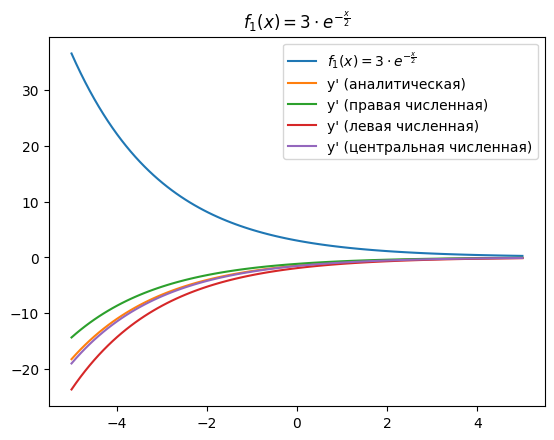

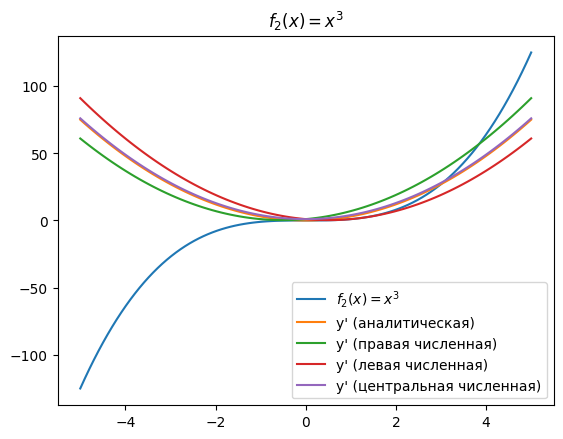

In [16]:
x = np.linspace(-5, 5, 100)
plot_derivatives_comprasion(F=f_1, F_der=f_1_der, x=x, h=1, F_description="$f_1(x) = 3 \cdot e^{- \\frac{x}{2}}$")
plot_derivatives_comprasion(F=f_2, F_der=f_2_der, x=x, h=1, F_description="$f_2(x) = x^3$")

Теперь высчитаем среднеквадратичное отклонение значений производной, полученных вычислительынм путем, от аналитических

In [17]:
def MSE(real: np.array, approx: np.array):
    """
    Compute mean squared error
    between real and approximation values
    Arguments:
      real: Real values
      approx: Approximation values
    """
    return np.mean(np.power(real - approx, 2))

def compute_MSE_comprassion_for_derivatives(F: Callable[[float], float],
                            compare_function,
                            x: np.array,
                            h: float):
    return MSE(F(x), compare_function(x, h))

def print_MSE_comprasion( F: Callable[[float], float],
                          compare_functions_info: List[Tuple[Callable[[float], float], str]],
                          x: np.array,
                          h: float,
                          F_description: str = "Исходная функция"):
    """
    Вывод результатов подсчета среднеквадратичного отклонения для разных методов
    Arguments:
        F: Аналитически посчитанная функция
        compare_functions_info: Список пар (Функция для сревнения, ее тектсовое описание)
        x: Список аргументов функции F
        h: Шаг сетки
        F_description: Опциональный аргумент текстового описания функции
    """
    print(f"MSE comprasion info for {F_description}")
    for func, info in compare_functions_info:
        print(f"MSE for {info} = {compute_MSE_comprassion_for_derivatives(F, func, x, h)}")

In [18]:
x = np.linspace(-5, 5, 100)
compare_functions = [
    (right_diff, "Правая производная"),
    (left_diff, "Левая производная"),
    (central_diff, "Центральная производная"),
]
compare_functions_info_1 = [
    (link_func_to_diff(f_1, func), info) for func, info in compare_functions
]
print_MSE_comprasion(
    F=f_1_der,
    compare_functions_info=compare_functions_info_1,
    x=x,
    h=0.1,
    F_description="$f_1(x) = 3 \cdot e^{- \\frac{x}{2}}$"
)

MSE comprasion info for $f_1(x) = 3 \cdot e^{- \frac{x}{2}}$
MSE for Правая производная = 0.021012874580167634
MSE for Левая производная = 0.022461497227601747
MSE for Центральная производная = 6.035424748547546e-06


In [19]:
compare_functions_info_2 = [
    (link_func_to_diff(f_2, func), info) for func, info in compare_functions
]
print_MSE_comprasion(
    F=f_2_der,
    compare_functions_info=compare_functions_info_2,
    x=x,
    h=0.1,
    F_description="$f_2(x) = x^3$"
)

MSE comprasion info for $f_2(x) = x^3$
MSE for Правая производная = 0.7652515151514987
MSE for Левая производная = 0.7652515151514993
MSE for Центральная производная = 9.999999999937836e-05


### Теперь для каждого значения h высчитаем среднеквадратичное отклонение и построим графики

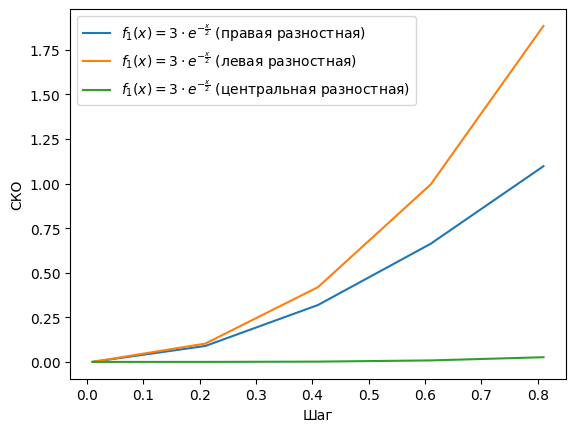

In [20]:
h_list = [i/100 for i in range(1, 100, 20)]

mse_left = [MSE(f_1_der(x), left_diff(f_1, x, h)) for h in h_list]
mse_right = [MSE(f_1_der(x), right_diff(f_1, x, h)) for h in h_list]
mse_central = [MSE(f_1_der(x), central_diff(f_1, x, h)) for h in h_list]

plt.plot(h_list, mse_right, label='$f_1(x) = 3 \cdot e^{- \\frac{x}{2}}$ (правая разностная)')
plt.plot(h_list, mse_left, label='$f_1(x) = 3 \cdot e^{- \\frac{x}{2}}$ (левая разностная)')
plt.plot(h_list, mse_central, label='$f_1(x) = 3 \cdot e^{- \\frac{x}{2}}$ (центральная разностная)')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

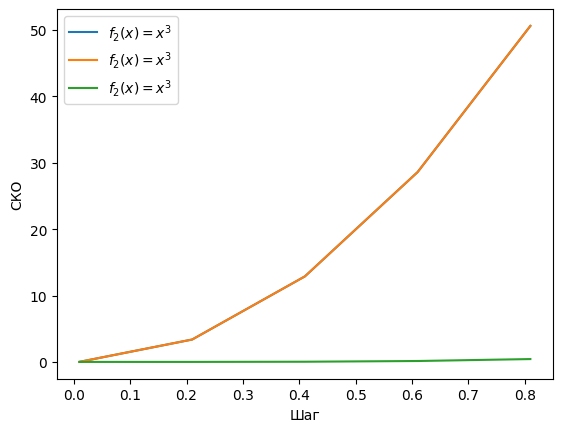

In [21]:
h_list = [i/100 for i in range(1, 100, 20)]

mse_left = [MSE(f_2_der(x), left_diff(f_2, x, h)) for h in h_list]
mse_right = [MSE(f_2_der(x), right_diff(f_2, x, h)) for h in h_list]
mse_central = [MSE(f_2_der(x), central_diff(f_2, x, h)) for h in h_list]

plt.plot(h_list, mse_right, label='$f_2(x) = x^3$')
plt.plot(h_list, mse_left, label='$f_2(x) = x^3$')
plt.plot(h_list, mse_central, label='$f_2(x) = x^3$')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

### Вывод: центральная разностная производная сильнее приближена к истинному значению и имеет более низкую меру возрастания ошибки, недели левая и правая

# Методы численного интегрирования

### Пусть исходные функции
$f_1(x) = sin(x)$   
$f_2(x) = x^3$

Посчитаем чему равны аналитические интегралы

In [33]:
f_3 = lambda x: np.sin(x)
f_4 = lambda x: np.power(x, 3)

def f_3_I(a, b):
  return np.cos(a) - np.cos(b)

def f_4_I(a, b):
  return 0.25 * (np.power(b, 4) - np.power(a, 4))

### Реализуем методы численного интегрирования.

In [23]:
def left_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a, b, h)) * h)

def right_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a + h, b + h, h)) * h)

def central_rectangles(f, a, b, h):
    return np.sum(f(np.arange(a + h / 2, b + h / 2, h)) * h)

def trapezoidal(f, a, b, h):
    return h / 2 * (f(a) + f(b) + 2 * np.sum(f(np.arange(a + h, b, h))))

def simpson(f, a, b, h):
    return h / 3 * (f(a) + f(b) + 4 * np.sum(f(np.arange(a + h, b, 2 * h))) + 2 * np.sum(f(np.arange(a + 2 * h, b, 2 * h))))

In [37]:
a, b, h = 0, 1, 0.1

print(f"f_3(x) = sin(x), a={a}, b={b}, h={h}")
print("Аналитическое решение: ", f_3_I(a, b))
print("Метод левых прямоугольников: ", left_rectangles(f_3, a, b, h))
print("Метод правых прямоугольников: ", right_rectangles(f_3, a, b, h))
print("Метод центральных прямоугольников: ", central_rectangles(f_3, a, b, h))
print("Метод трапеций: ", trapezoidal(f_3, a, b, h))
print("Метод Симпсона: ", simpson(f_3, a, b, h), end='\n\n')


print(f"f_4(x) = x^3, a={a}, b={b}, h={h}")
print("Аналитическое решение: ", f_4_I(a, b))
print("Метод левых прямоугольников: ", left_rectangles(f_4, a, b, h))
print("Метод правых прямоугольников: ", right_rectangles(f_4, a, b, h))
print("Метод центральных прямоугольников: ", central_rectangles(f_4, a, b, h))
print("Метод трапеций: ", trapezoidal(f_4, a, b, h))
print("Метод Симпсона: ", simpson(f_4, a, b, h), end='\n\n')

f_3(x) = sin(x), a=0, b=1, h=0.1
Аналитическое решение:  0.45969769413186023
Метод левых прямоугольников:  0.4172409996175816
Метод правых прямоугольников:  0.5013880980983713
Метод центральных прямоугольников:  0.4598892907185182
Метод трапеций:  0.4593145488579764
Метод Симпсона:  0.45969794982382056

f_4(x) = x^3, a=0, b=1, h=0.1
Аналитическое решение:  0.25
Метод левых прямоугольников:  0.20250000000000007
Метод правых прямоугольников:  0.3025
Метод центральных прямоугольников:  0.24875000000000017
Метод трапеций:  0.25250000000000006
Метод Симпсона:  0.2500000000000001



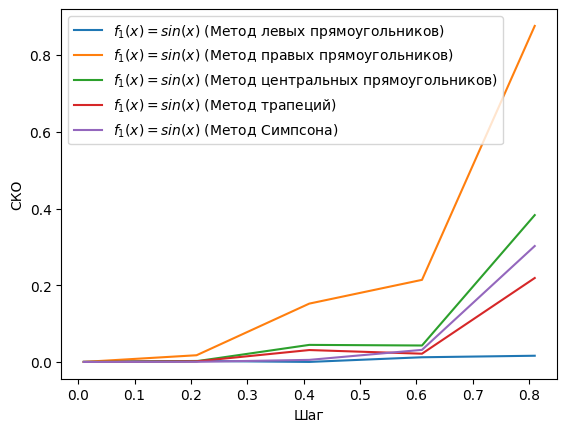

In [38]:
h_list = [i/100 for i in range(1, 100, 20)]

mse_left = [MSE(f_3_I(a, b), left_rectangles(f_3, a, b, h)) for h in h_list]
mse_right = [MSE(f_3_I(a, b), right_rectangles(f_3, a, b, h)) for h in h_list]
mse_central = [MSE(f_3_I(a, b), central_rectangles(f_3, a, b, h)) for h in h_list]
mse_trapezodial = [MSE(f_3_I(a, b), trapezoidal(f_3, a, b, h)) for h in h_list]
mse_simpson = [MSE(f_3_I(a, b), simpson(f_3, a, b, h)) for h in h_list]

plt.plot(h_list, mse_left, label='$f_1(x) = sin(x)$ (Метод левых прямоугольников)')
plt.plot(h_list, mse_right, label='$f_1(x) = sin(x)$ (Метод правых прямоугольников)')
plt.plot(h_list, mse_central, label='$f_1(x) = sin(x)$ (Метод центральных прямоугольников)')
plt.plot(h_list, mse_trapezodial, label='$f_1(x) = sin(x)$ (Метод трапеций)')
plt.plot(h_list, mse_simpson, label='$f_1(x) = sin(x)$ (Метод Симпсона)')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

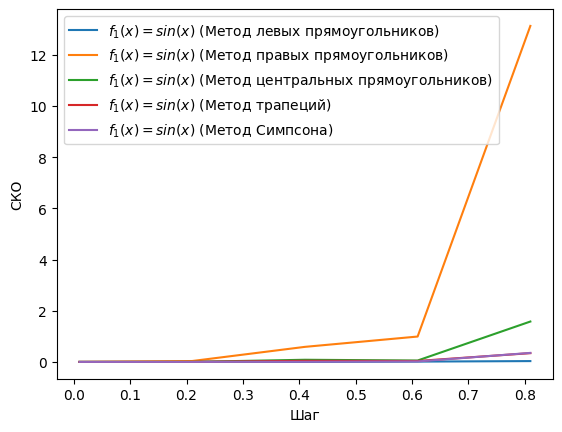

In [41]:
mse_left = [MSE(f_4_I(a, b), left_rectangles(f_4, a, b, h)) for h in h_list]
mse_right = [MSE(f_4_I(a, b), right_rectangles(f_4, a, b, h)) for h in h_list]
mse_central = [MSE(f_4_I(a, b), central_rectangles(f_4, a, b, h)) for h in h_list]
mse_trapezodial = [MSE(f_4_I(a, b), trapezoidal(f_4, a, b, h)) for h in h_list]
mse_simpson = [MSE(f_4_I(a, b), simpson(f_4, a, b, h)) for h in h_list]

plt.plot(h_list, mse_left, label='$f_1(x) = sin(x)$ (Метод левых прямоугольников)')
plt.plot(h_list, mse_right, label='$f_1(x) = sin(x)$ (Метод правых прямоугольников)')
plt.plot(h_list, mse_central, label='$f_1(x) = sin(x)$ (Метод центральных прямоугольников)')
plt.plot(h_list, mse_trapezodial, label='$f_1(x) = sin(x)$ (Метод трапеций)')
plt.plot(h_list, mse_simpson, label='$f_1(x) = sin(x)$ (Метод Симпсона)')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

### Вывод: По графикам отчётливо видно, что при увеличении шага, среднеквадратическое отклонение увеличивается. Кроме того, самыми устойчивыми и точными методами для обеих функций оказались Метод левых прямоугольников?, Метод трапеций и метод Симпсона